In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np

rng = np.random.default_rng()

In [89]:
from mtt.sensor import Sensor
from mtt.simulator import Simulator
from mtt.data import OnlineDataset

init_simulator = lambda: Simulator(
    max_targets=10,
    p_initial=4,
    p_birth=2,
    p_survival=0.95,
    sigma_motion=0.1,
    sigma_initial_state=(3.0, 1.0, 1.0),
    max_distance=1e6,
)
init_sensor = lambda: Sensor(position=(1, 1), noise=(0.2, 0.1), p_detection=0.9)
dataset = OnlineDataset(n_steps=100, length=5, img_size=128, init_simulator=init_simulator, init_sensor=init_sensor)
dataset = list(dataset)

In [4]:
from mtt.models import Conv3dCoder
from torchinfo import summary

model = Conv3dCoder(n_channels=128, img_size=128, n_encoder=3, n_hidden=2, kernel_time=3, kernel_space=9, length=3)
summary(model, (1,1) + model.input_shape)

Layer (type:depth-idx)                   Output Shape              Param #
Conv3dCoder                              --                        --
├─Sequential: 1-1                        [1, 128, 3, 16, 16]       --
│    └─Conv3d: 2-1                       [1, 128, 3, 64, 64]       31,232
│    └─ReLU: 2-2                         [1, 128, 3, 64, 64]       --
│    └─Conv3d: 2-3                       [1, 128, 3, 32, 32]       3,981,440
│    └─ReLU: 2-4                         [1, 128, 3, 32, 32]       --
│    └─Conv3d: 2-5                       [1, 128, 3, 16, 16]       3,981,440
│    └─ReLU: 2-6                         [1, 128, 3, 16, 16]       --
├─Sequential: 1-2                        [128, 768]                --
│    └─Linear: 2-7                       [128, 768]                590,592
│    └─ReLU: 2-8                         [128, 768]                --
│    └─Linear: 2-9                       [128, 768]                590,592
│    └─ReLU: 2-10                        [128, 768]      

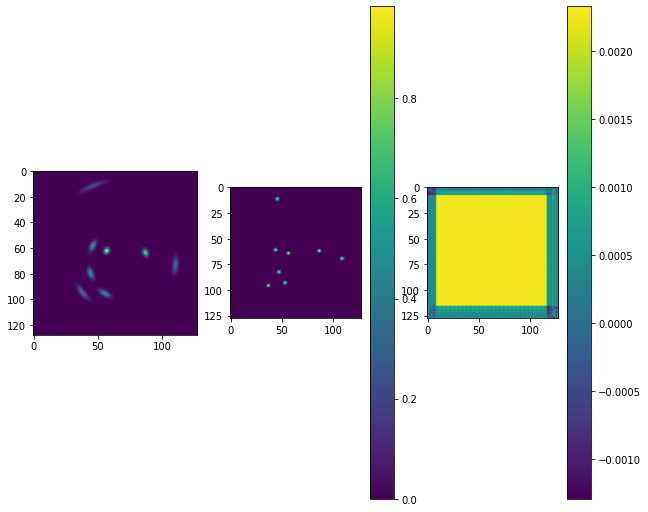

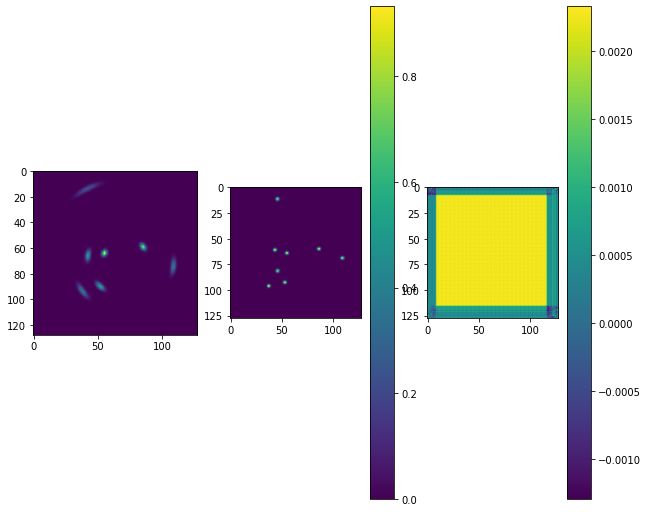

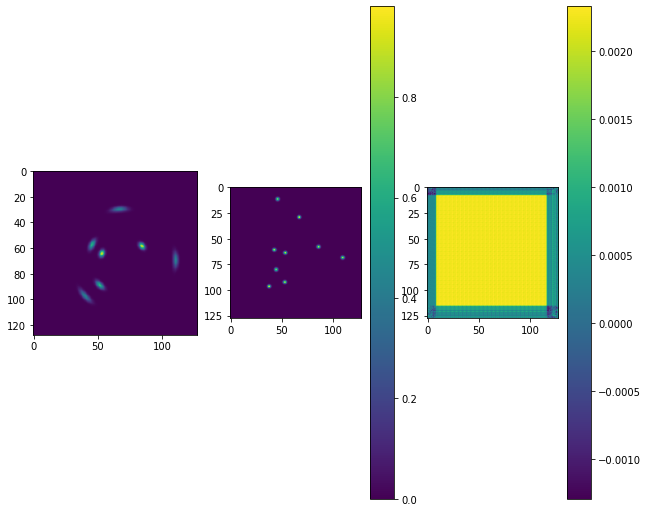

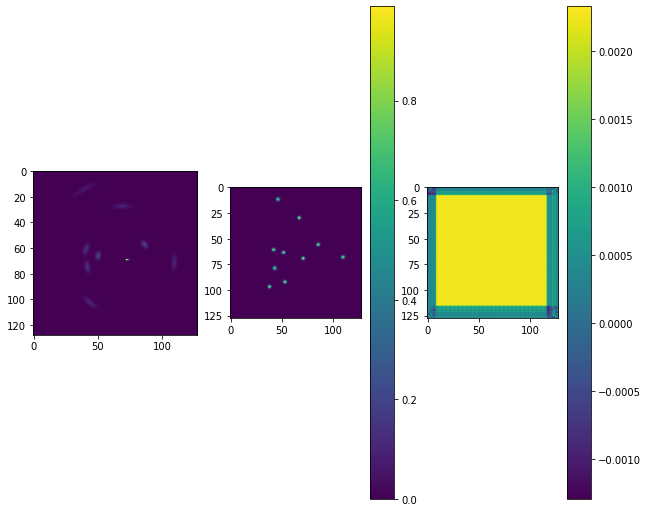

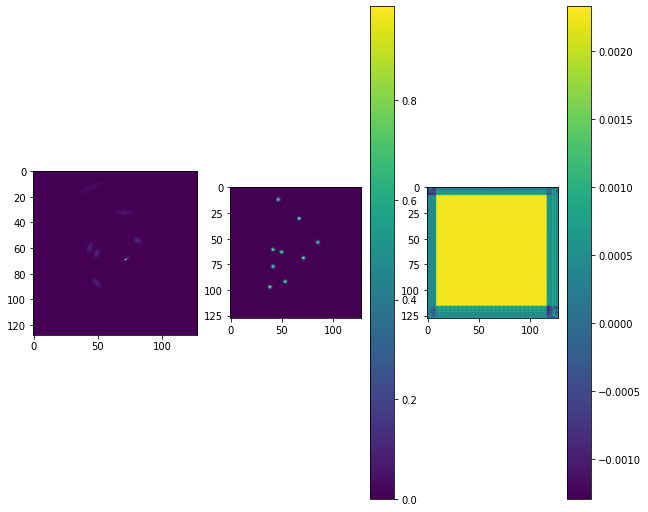

In [111]:
import guild.ipy as guild
import matplotlib.pyplot as plt
import numpy as np

run = guild.runs().iloc[0]
checkpoint = run.run.fmt["run_dir"] + "/checkpoints/last.ckpt"
model = Conv3dCoder.load_from_checkpoint(checkpoint)

img_in, img_out, *_ = dataset[50]
out = model(img_in[None,...])

for i in range(model.hparams.length):
    im1 = img_in[0,i].cpu().detach().numpy()
    im2 = img_out[0,i].cpu().detach().numpy()
    im3 = out[0,0,i].cpu().detach().numpy()

    plt.figure(figsize=(10,10))
    plt.subplot(131)
    plt.imshow(im1)
    plt.subplot(132)
    plt.imshow(im2)
    plt.colorbar()
    plt.subplot(133)
    plt.imshow(im3)
    plt.colorbar()